#📌 Extracão

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from IPython.display import display

print("Bibliotecas importadas com sucesso!")

try:
    dados = pd.read_csv('dados_tratados.csv')
    print("Arquivo 'dados_tratados.csv' carregado com sucesso!")
    print("Amostra dos dados:")
    display(dados.head())
except FileNotFoundError:
    print("ERRO: O arquivo 'dados_tratados.csv' não foi encontrado.")
    print("Por favor, certifique-se de que você fez o upload do arquivo no menu à esquerda.")




Bibliotecas importadas com sucesso!
Arquivo 'dados_tratados.csv' carregado com sucesso!
Amostra dos dados:


,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,Nao,Feminino,0,Sim,Sim,9,Sim,No,DSL,...,Yes,No,Yes,Yes,No,One year,Sim,Mailed check,65.6,593.30
1,0003-MKNFE,Nao,Masculino,0,Nao,Nao,9,Sim,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,Nao,Mailed check,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,0,Nao,Nao,4,Sim,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Sim,Electronic check,73.9,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Nao,13,Sim,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Sim,Electronic check,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Nao,3,Sim,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Sim,Mailed check,83.9,267.40


#🔧 Transformação

In [66]:

X = dados.drop(['ID_Cliente', 'Churn'], axis=1)
y = dados['Churn']


X = pd.get_dummies(X, drop_first=True)


y = y.apply(lambda x: 1 if x == 'Sim' else 0)

print("\nDados transformados em formato numérico.")
print("Formato das features (X):", X.shape)
print("Formato do alvo (y):", y.shape)


Dados transformados em formato numérico.
Formato das features (X): (7032, 30)
Formato do alvo (y): (7032,)


In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dados divididos em conjuntos de treino e teste com sucesso.")
print(f"Tamanho do treino: {len(X_train)} amostras")
print(f"Tamanho do teste: {len(X_test)} amostras")

Dados divididos em conjuntos de treino e teste com sucesso.
Tamanho do treino: 5625 amostras
Tamanho do teste: 1407 amostras


In [70]:
modelo_floresta = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_floresta.fit(X_train, y_train)


previsoes = modelo_floresta.predict(X_test)


print("Relatório de Classificação do Modelo")
report = classification_report(y_test, previsoes, target_names=['Não Churn', 'Churn'])
print(report)

Relatório de Classificação do Modelo
              precision    recall  f1-score   support

   Não Churn       0.82      0.90      0.86      1033
       Churn       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



#📊 Carga e análise

/tmp/ipython-input-526884274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Probabilidade_Churn', y='ID_Cliente', data=df_top_risco, palette='OrRd_r')


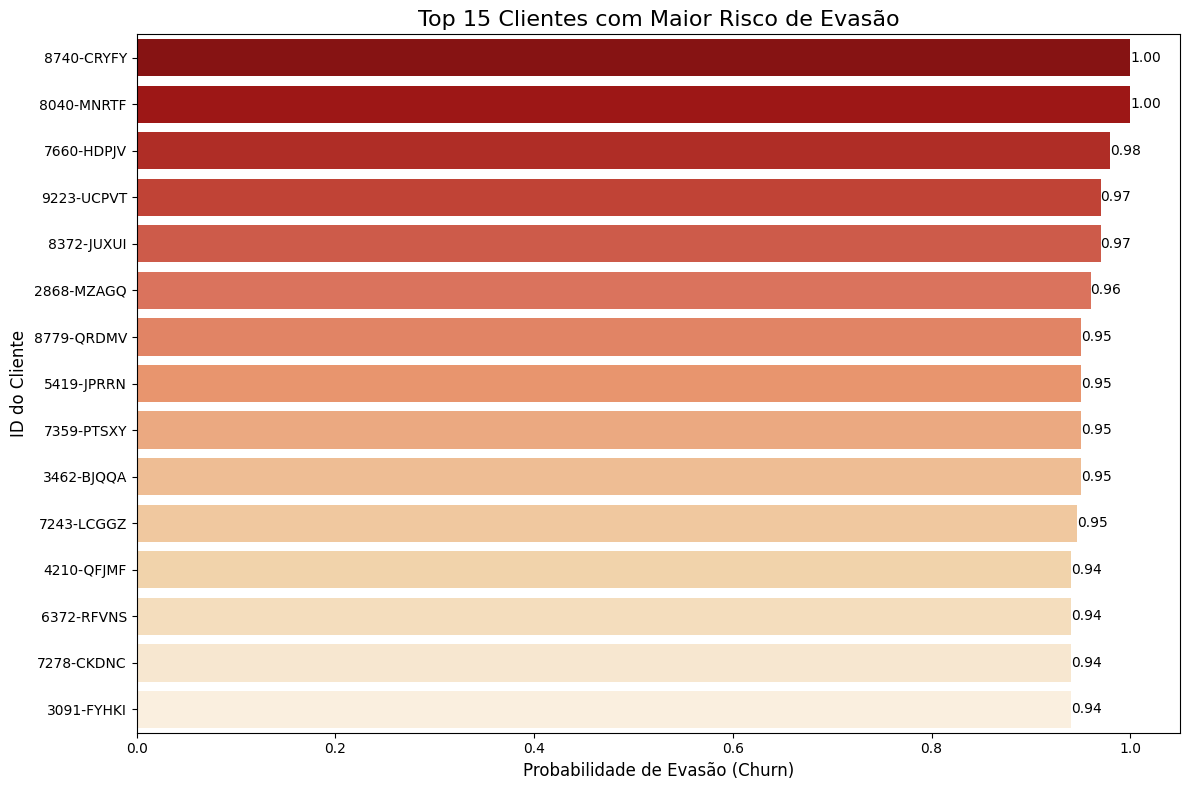

In [68]:

probabilidades_churn = modelo_floresta.predict_proba(X_test)[:, 1]
df_risco = pd.DataFrame({
    'ID_Cliente': dados.loc[X_test.index, 'ID_Cliente'],
    'Probabilidade_Churn': probabilidades_churn
}).sort_values(by='Probabilidade_Churn', ascending=False)
df_top_risco = df_risco.head(15)


plt.figure(figsize=(12, 8))
sns.barplot(x='Probabilidade_Churn', y='ID_Cliente', data=df_top_risco, palette='OrRd_r')
plt.title('Top 15 Clientes com Maior Risco de Evasão', fontsize=16)
plt.xlabel('Probabilidade de Evasão (Churn)', fontsize=12)
plt.ylabel('ID do Cliente', fontsize=12)
plt.xlim(0, 1.05)


for index, value in enumerate(df_top_risco['Probabilidade_Churn']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.tight_layout()
plt.show()

Análise das Variáveis Mais Importantes


/tmp/ipython-input-4038751923.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_features.values, y=importancia_features.index, palette='viridis')


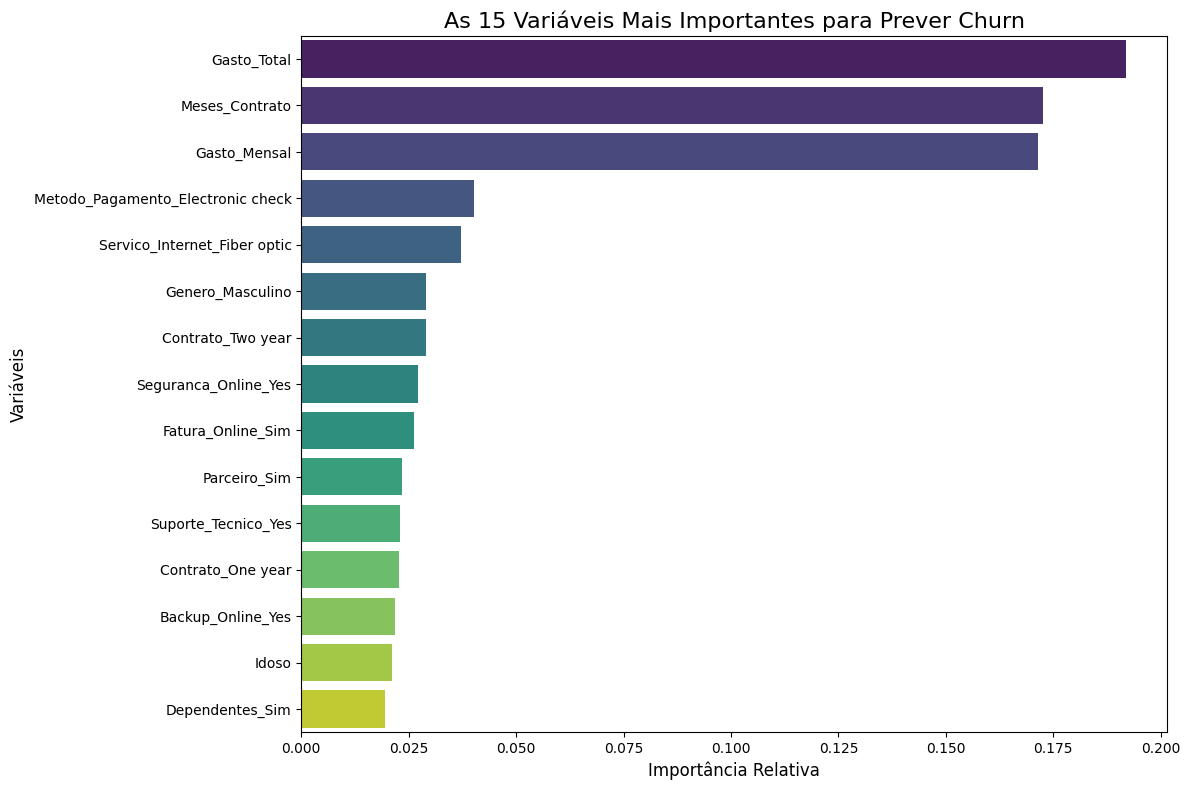

In [42]:


print("Análise das Variáveis Mais Importantes")

importancia_features = pd.Series(modelo_floresta.feature_importances_, index=X.columns)
importancia_features = importancia_features.nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=importancia_features.values, y=importancia_features.index, palette='viridis')
plt.title('As 15 Variáveis Mais Importantes para Prever Churn', fontsize=16)
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.tight_layout()
plt.show()

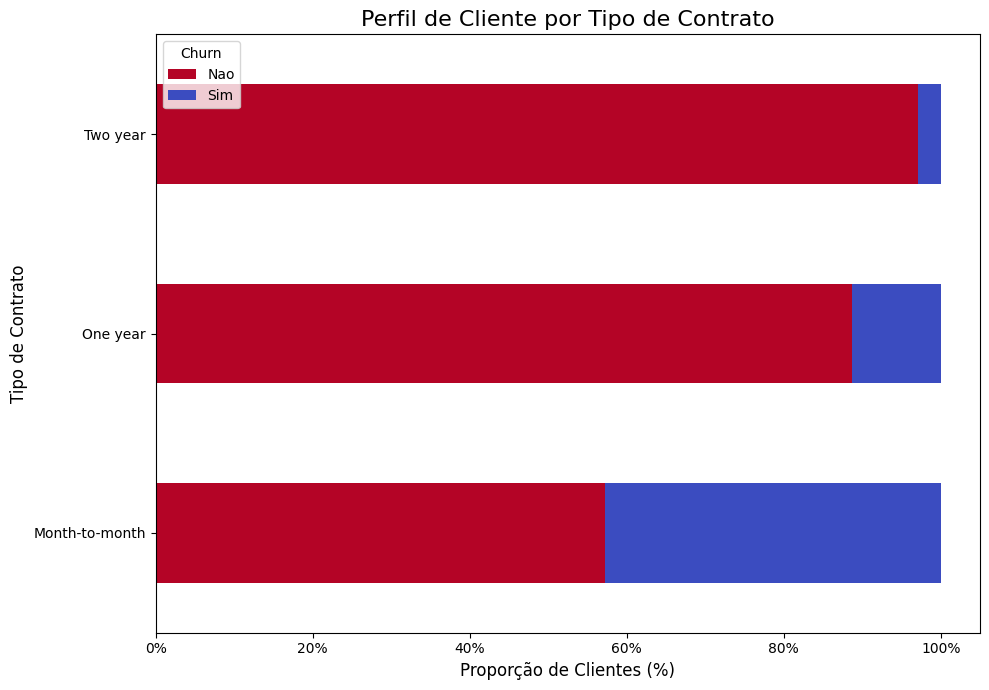

In [53]:
dados_contrato = dados.groupby('Contrato')['Churn'].value_counts(normalize=True).unstack().fillna(0)


dados_contrato.plot(kind='barh', stacked=True, colormap='coolwarm_r', figsize=(10, 7))
plt.title('Perfil de Cliente por Tipo de Contrato', fontsize=16)
plt.xlabel('Proporção de Clientes (%)', fontsize=12)
plt.ylabel('Tipo de Contrato', fontsize=12)
plt.legend(title='Churn', loc='best')


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

plt.tight_layout()
plt.show()

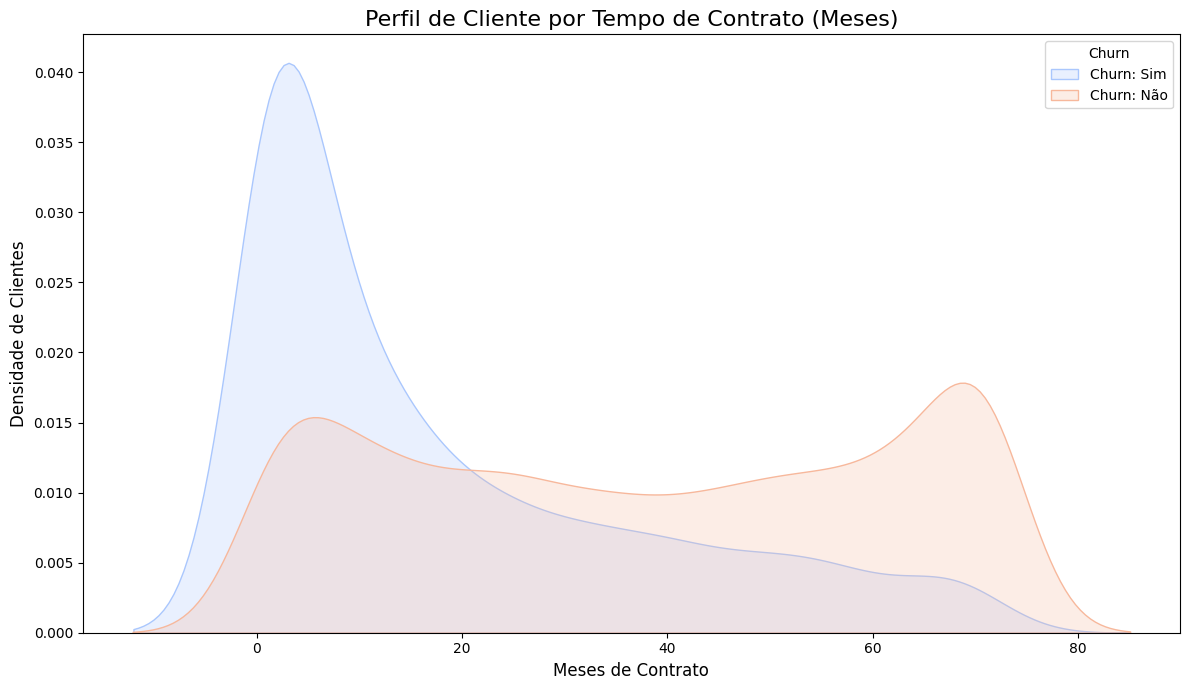

In [52]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=dados, x='Meses_Contrato', hue='Churn', fill=True, palette='coolwarm_r', common_norm=False)
plt.title('Perfil de Cliente por Tempo de Contrato (Meses)', fontsize=16)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.ylabel('Densidade de Clientes', fontsize=12)
plt.legend(title='Churn', labels=['Churn: Sim', 'Churn: Não'])
plt.tight_layout()
plt.show()

#📄Relatorio Final

Relatório de Análise de Evasão de Clientes – Telecom X Pt. 2

Introdução

O presente projeto foi concebido para endereçar um desafio crítico enfrentado pela empresa Telecom X: uma alta e contínua taxa de evasão de clientes (churn). O objetivo principal foi aplicar técnicas de Ciência de Dados para transitar de uma postura reativa para uma proativa, não apenas compreendendo as razões históricas do churn, mas também desenvolvendo a capacidade de prever quais clientes estariam mais propensos a cancelar seus serviços no futuro. A meta foi transformar dados brutos em uma ferramenta estratégica que permitisse à empresa tomar decisões informadas para a retenção de sua base de clientes, reduzindo perdas e fortalecendo o relacionamento com seus consumidores.

Desenvolvimento

O trabalho foi executado em duas fases principais, utilizando Python e suas bibliotecas de análise (Pandas, Matplotlib, Seaborn) e Machine Learning (Scikit-learn).

Tratamento e Análise Exploratória (ETL e EDA): A primeira fase focou na preparação dos dados. As informações, originalmente em um arquivo JSON com estrutura complexa, foram extraídas, limpas e organizadas em um formato tabular. Foram corrigidos valores ausentes e inconsistentes, os tipos de dados foram ajustados e todas as colunas e categorias foram padronizadas para o português. Esta etapa foi fundamental para garantir a qualidade dos dados e culminou na criação de um arquivo CSV tratado, que serviu como base para a fase seguinte. A análise exploratória inicial já revelou fortes indícios de que o tipo de contrato e o tempo de serviço eram fatores relevantes para o churn.

Construção do Modelo Preditivo: A segunda fase consistiu na criação de um modelo de Machine Learning para prever a evasão. O algoritmo Random Forest Classifier foi selecionado por sua alta performance e capacidade de interpretar a importância de cada variável. Os dados tratados foram transformados em um formato numérico (usando One-Hot Encoding) e divididos em conjuntos de treino e teste para uma avaliação robusta. O modelo foi treinado com sucesso, alcançando uma acurácia de 79%, e foi utilizado para extrair os principais insights, identificando os fatores mais decisivos para o churn e gerando uma lista de clientes com alta probabilidade de cancelamento.

Conclusão

A análise preditiva confirmou que a evasão de clientes não é um evento aleatório, mas sim um comportamento influenciado por fatores claros e mensuráveis. O modelo identificou que o tipo de contrato (mês a mês), o tempo de serviço do cliente (baixo tempo de contrato) e o valor da fatura mensal (alto gasto) são os principais impulsionadores do churn.

Com base nestas descobertas, o projeto conclui com as seguintes recomendações estratégicas:

Ação de Retenção Proativa: Utilizar a lista de clientes com alta probabilidade de churn, gerada pelo modelo, para que a equipe de retenção possa contatá-los com ofertas personalizadas antes que a decisão de cancelar seja tomada.

Reformulação da Estratégia de Contratos: Desenvolver campanhas de marketing e incentivos para migrar clientes do plano mensal, de alto risco, para contratos de longo prazo (1 ou 2 anos), que demonstraram ser o fator mais forte de retenção.

Fidelização do Cliente Ideal: Reconhecer e recompensar o perfil de cliente de baixo risco (contrato longo, alta fidelidade) com programas de lealdade, reforçando seu valor para a empresa.

Em suma, o projeto transformou com sucesso um problema de negócio em uma solução de dados, entregando não apenas um modelo funcional, mas também uma inteligência de mercado que capacita a Telecom X a tomar decisões mais estratégicas e eficazes para garantir sua saúde financeira e a satisfação de seus clientes.